In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import os
import gzip


C:\Users\araff\Anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


In [2]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)
    return images, labels

def load_FashionMNIST(data_path):
    Xtrn, Ytrn = load_mnist(data_path, "train")
    Xtst, Ytst = load_mnist(data_path, "t10k")
    return Xtrn.astype(np.float), Ytrn, Xtst.astype(np.float), Ytst

In [3]:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST(os.getcwd())
Xtrn_orig = Xtrn.copy()
Xtst_orig = Xtst.copy()
Xtrn = Xtrn / 255.0
Xtst = Xtst / 255.0
Xmean = np.mean(Xtrn, axis=0)
Xtrn_nm = np.ones(Xtrn.shape)
Xtst_nm = np.ones(Xtst.shape)
for row in range(Xtrn.shape[0] - 1):
    Xtrn_nm[row] = Xtrn[row] - Xmean
for row in range(Xtst.shape[0] - 1):
    Xtst_nm[row] = Xtst[row] - Xmean

In [4]:
cl = SVC()
pca = PCA(2)

In [5]:
pca.fit(Xtrn_nm, Ytrn)
X_train = pca.transform(Xtrn_nm)
X_test = pca.transform(Xtst_nm)

In [6]:
cl.fit(X_train, Ytrn)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
component1 = X_train[:,0]
component2 = X_train[:,1]
sigma1 = np.std(component1)
sigma2 = np.std(component2)

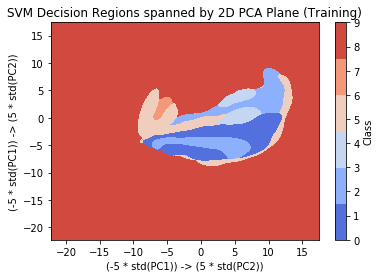

In [8]:
X1, X2 = np.meshgrid(np.arange(start = (-5 * sigma1), stop = (5 * sigma2), step = 0.01),
                     np.arange(start = (-5 * sigma1), stop = (5 * sigma2), step = 0.01))
plt.contourf(X1, X2, cl.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), cmap = "coolwarm")
plt.xlim((-5 * sigma1), (5 * sigma2))
plt.ylim((-5 * sigma1), (5 * sigma2))
plt.colorbar(ticks = [0,1,2,3,4,5,6,7,8,9], label = "Class")
plt.title("SVM Decision Regions spanned by 2D PCA Plane (Training)")
plt.xlabel("(-5 * std(PC1)) -> (5 * std(PC2))")
plt.ylabel("(-5 * std(PC1)) -> (5 * std(PC2))")
plt.savefig("2_4.png")
plt.show()